In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.datasets import fashion_mnist
# from tensorflow.keras.models import Model
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Dataset 1 -- FASHION  MNIST DATA
## There are two ways to load the data:
### (1) Load the 2 downloaded csv files for training and testing and then inherite Pytorch Dataset class;
### (2) Dirctly use Pytorch module torchvision.datasets.

In [2]:
## method 1
train_csv = pd.read_csv("./datasets/fashion/fashion-mnist_train.csv")
test_csv = pd.read_csv("./datasets/fashion/fashion-mnist_test.csv")
batch_size = 100

class FashionData(Dataset):
    '''
    User-define class to build a dataset using Pytorch class Dataset,
    with 2 methods: get_item() and len():
        get_item() return the images and labels
        len() returns the number of items in a dataset.
    '''
    def __init__(self, data, transform=None):
        '''Initialize variables'''
        self.fashion_MNIST = list(data.values)
        self.transform = transform
        label = []
        image = []
        for i in self.fashion_MNIST:
            label.append(i[0])#first col is the label
            image.append(i[1:])
        
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1,28,28,1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]

        if self.transform is not None:
            image = self.transform(image)
        
        return image, label
    def __len__(self):
        return len(self.images)

#Load data into Tensor with transformation on the image (pixel --> range from 0 to 1)
# transforms.ToTensor(): Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] 
#       to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
train_data = FashionData(train_csv, transform=transforms.Compose([transforms.ToTensor()])) 
test_data = FashionData(test_csv, transform=transforms.Compose([transforms.ToTensor()]))
# wrapup into dataloader
train_loader = DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size,shuffle=False)

## method 2 (just show here)
'''
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))  
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size)
'''
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    label = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[label]
    

2 :  Pullover


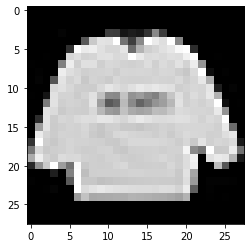

In [3]:
image, label = next(iter(train_data))
plt.imshow(image.squeeze(), cmap="gray")
print(label,': ',output_label(label))

# Dataset 2 -- Edvard Munch Paintings

The images are different sizes but we'll need them to all be the same size for training

<AxesSubplot:>

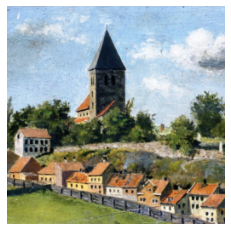

In [4]:
painting_details =  pd.read_csv('./datasets/munch_paintings/edvard_munch.csv')
# painting_details.head()
image_path = './datasets/munch_paintings/munch_paintings'
# here after viewing real size for images we can say 256*256 would be good.
# image_size = (256,256)
batch_size = 32
# ImageFolder expects the class folder
images_dataset = torchvision.datasets.ImageFolder(image_path,\
                                                  transform=transforms.Compose([transforms.Resize(256), 
                                                    #smaller edge of the image will be matched to this number.
                                 transforms.CenterCrop(256),
                                 transforms.ToTensor()]))
data_loader = DataLoader(images_dataset, batch_size=batch_size,shuffle=False)

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0)) # (3,256,256) -> (256,256,3)

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1) #Given an interval, values outside the interval are clipped to the interval edges.

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

images, labels = next(iter(data_loader))
imshow(images[0], normalize=False)


# Dataset 3 -- Vincent Van Gogh paintings

<AxesSubplot:>

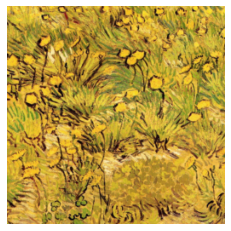

In [5]:
painting_details =  pd.read_csv('./datasets/vincent_paintings/VanGoghPaintings.csv')
painting_details.head()
image_path = './datasets/vincent_paintings/VincentVanGogh'
# here after viewing real size for images we can say 256*256 would be good.
# image_size = (256,256)
batch_size = 32
# ImageFolder expects the class folder
images_dataset = torchvision.datasets.ImageFolder(image_path,\
                                                  transform=transforms.Compose([transforms.Resize(256), 
                                                    #smaller edge of the image will be matched to this number.
                                 transforms.CenterCrop(256),
                                 transforms.ToTensor()]))
data_loader = DataLoader(images_dataset, batch_size=batch_size,shuffle=False)

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0)) # (3,256,256) -> (256,256,3)

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1) #Given an interval, values outside the interval are clipped to the interval edges.

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

images, labels = next(iter(data_loader))
imshow(images[0], normalize=False)
